In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab as pl
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
sns.set()

In [3]:
raw_data = pd.read_csv('..\Data\Time Series Analysis in Python\Section 3\S_3_L_11\Index2018.csv')
df = raw_data.copy()

In [4]:
df.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [5]:
df.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


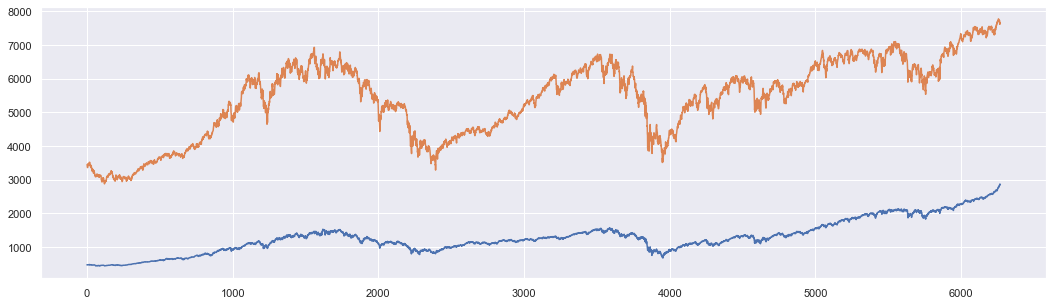

In [6]:
df.spx.plot(figsize=(18,5))
df.ftse.plot(figsize=(18,5))
plt.show()

#### QQ PLot

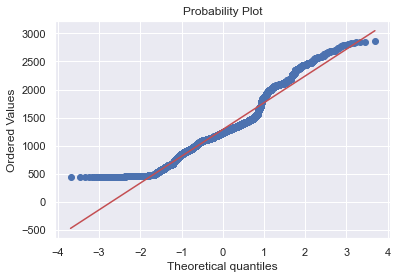

In [7]:
# In this case the data is not normally distributed
stats.probplot(df.spx, dist="norm", plot=pl)
pl.show()

In [8]:
df.date.describe()

count           6269
unique          6269
top       07/01/1994
freq               1
Name: date, dtype: object

In [9]:
df.date = pd.to_datetime(df.date, format='%d/%m/%Y')

In [10]:
df.date.describe(datetime_is_numeric=True)

count                             6269
mean     2006-01-14 19:36:59.492742144
min                1994-01-07 00:00:00
25%                2000-01-11 00:00:00
50%                2006-01-12 00:00:00
75%                2012-01-19 00:00:00
max                2018-01-29 00:00:00
Name: date, dtype: object

In [11]:
df.set_index('date', inplace=True)

In [12]:
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [13]:
 df.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [14]:
df = df.asfreq('B')

In [15]:
df.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [16]:
df.spx.fillna(method='ffill', inplace=True)
df.dax.fillna(value=df.dax.mean(), inplace=True)
df.ftse.fillna(method='bfill', inplace=True)

In [17]:
df.isna().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

In [18]:
df['Market_Value'] = df.spx
df.Market_Value

date
1994-01-07     469.900000
1994-01-10     475.270000
1994-01-11     474.130000
1994-01-12     474.170000
1994-01-13     472.470000
                 ...     
2018-01-23    2839.130362
2018-01-24    2837.544008
2018-01-25    2839.253031
2018-01-26    2872.867839
2018-01-29    2853.528411
Freq: B, Name: Market_Value, Length: 6277, dtype: float64

In [19]:
size = int(len(df.Market_Value) * 0.8)

In [20]:
data = pd.DataFrame(df.Market_Value.iloc[:size])
data_test = pd.DataFrame(df.Market_Value.iloc[size:])

In [21]:
data

,Market_Value
date,
1994-01-07,469.900000
1994-01-10,475.270000
1994-01-11,474.130000
1994-01-12,474.170000
1994-01-13,472.470000
...,...
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978


#### White Noise

In [22]:
wn = np.random.normal(data.mean(), data.std(), size=len(data))

In [23]:
data['wn'] = wn

In [24]:
data.describe()

,Market_Value,wn
count,5021.000000,5021.000000
mean,1091.651926,1094.042961
std,292.559287,289.750700
min,438.920000,38.976359
25%,914.620000,898.049902
50%,1144.650000,1094.862009
75%,1316.280729,1290.250130
max,1570.252238,2259.445471


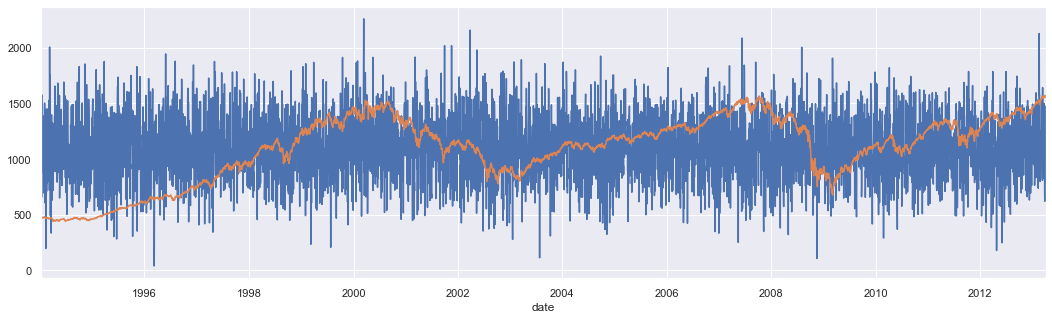

In [25]:
data.wn.plot(figsize=(18,5))
data.Market_Value.plot(figsize=(18,5))
plt.show()

In [26]:
rw = pd.read_csv('..\Data\Time Series Analysis in Python\RandWalk.csv')
rw.date = pd.to_datetime(rw.date, format='%d/%m/%Y')
rw.set_index('date', inplace=True)
rw = rw.asfreq('B')
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [27]:
data['rw'] = rw.price

In [28]:
data

,Market_Value,wn,rw
date,,,
1994-01-07,469.900000,1231.865968,1122.139662
1994-01-10,475.270000,943.650249,1080.347860
1994-01-11,474.130000,657.282969,1082.095245
1994-01-12,474.170000,819.522848,1083.639265
1994-01-13,472.470000,1251.823578,1067.146255
...,...,...,...
2013-04-01,1562.173837,620.036770,2263.675474
2013-04-02,1570.252238,1473.763672,2225.000870
2013-04-03,1553.686978,786.888959,2190.787688


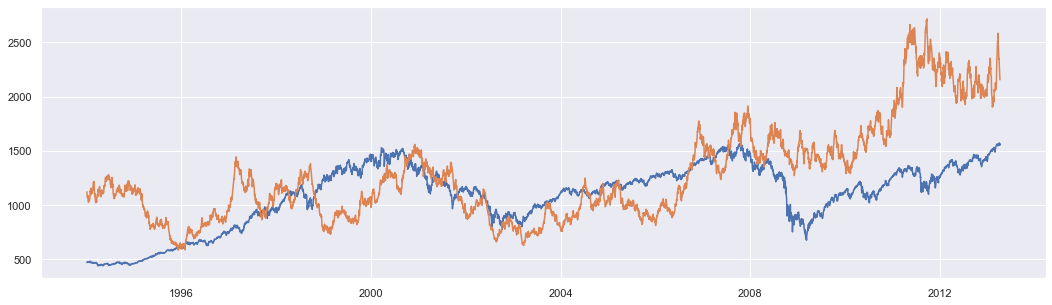

In [29]:
fig, ax = plt.subplots(figsize=(18,5))
ax.plot(data.index, data.Market_Value, label='Market Value')
ax.plot(data.index, data.rw, label='wn');

#### Stationarity

In [30]:
sts.adfuller(data.Market_Value)

(-1.7369847452352454,
 0.4121645696770613,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [31]:
sts.adfuller(data.wn)

(-70.55423068640586,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70706.67862036832)

#### Seasonality

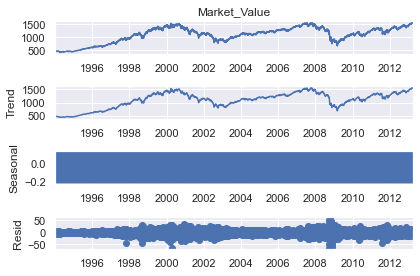

In [37]:
s_dec_add = seasonal_decompose(data.Market_Value, model='additive')
s_dec_add.plot()
plt.show()

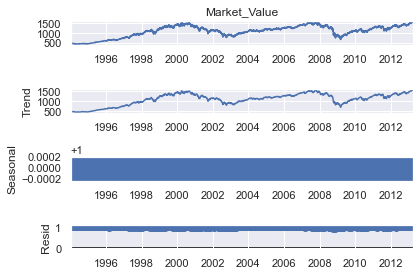

In [38]:
s_dec_mul = seasonal_decompose(data.Market_Value, model='multiplicative')
s_dec_mul.plot()
plt.show()

#### Autcorrelation ACF

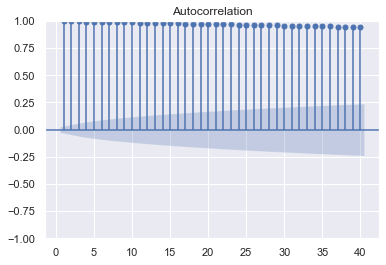

In [41]:
sgt.plot_acf(data.Market_Value, lags=40, zero=False)
plt.show()

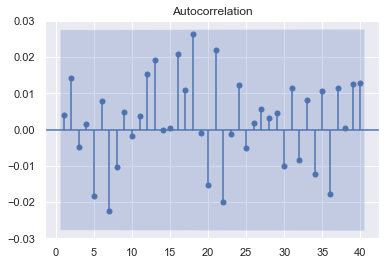

In [58]:
sgt.plot_acf(data.wn, lags=40, zero=False)
plt.ylim(-0.03, 0.03)
plt.show()

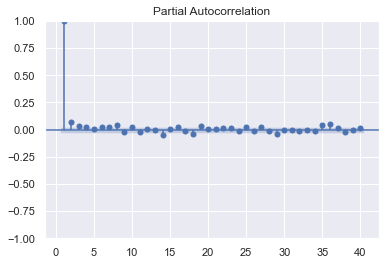

In [59]:
sgt.plot_pacf(data.Market_Value, lags=40, zero=False, method='ols')
plt.show()

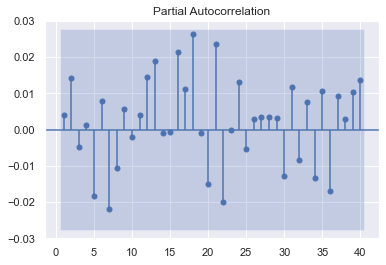

In [61]:
sgt.plot_pacf(data.wn, lags=40, zero=False, method='ols')
plt.ylim(-0.03, 0.03)
plt.show()

In [81]:
model_ar = ARIMA(data.Market_Value, order=(1,0,0))
result_ar = model_ar.fit()
result_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Market_Value   No. Observations:                 5021
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -20097.439
Date:                Sun, 07 Aug 2022   AIC                          40200.879
Time:                        20:23:19   BIC                          40220.443
Sample:                    01-07-1994   HQIC                         40207.734
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1091.6133    165.184      6.608      0.000     767.858    1415.369
ar.L1          0.9992      0.001   1695.377      0.000       0.998       1.000
sigma2       175.2480      1.771     98.978      0.000     171.778     178.718
===================================================================================
Ljung-Box (L1) (Q):                  24.60   Jarque-Bera (JB):              7473.06
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.29   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [85]:
model_ar_2 = ARIMA(data.Market_Value, order=(2,0,0))
result_ar_2 = model_ar_2.fit()
result_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Market_Value   No. Observations:                 5021
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -20085.289
Date:                Sun, 07 Aug 2022   AIC                          40178.578
Time:                        20:24:32   BIC                          40204.664
Sample:                    01-07-1994   HQIC                         40187.719
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1091.6076    223.343      4.888      0.000     653.863    1529.352
ar.L1          0.9300      0.009     99.031      0.000       0.912       0.948
ar.L2          0.0694      0.009      7.405      0.000       0.051       0.088
sigma2       174.3966      1.768     98.654      0.000     170.932     177.861
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              7475.27
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               2.25   Skew:                            -0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [94]:
model_ar_3 = ARIMA(data.Market_Value, order=(3,0,0))
result_ar_3 = model_ar_3.fit()
result_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Market_Value   No. Observations:                 5021
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -20083.003
Date:                Sun, 07 Aug 2022   AIC                          40176.005
Time:                        20:32:35   BIC                          40208.612
Sample:                    01-07-1994   HQIC                         40187.431
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1091.6519    119.496      9.135      0.000     857.444    1325.860
ar.L1          0.9271      0.009     97.886      0.000       0.909       0.946
ar.L2          0.0376      0.012      3.227      0.001       0.015       0.060
ar.L3          0.0342      0.008      4.437      0.000       0.019       0.049
sigma2       174.1643      1.799     96.828      0.000     170.639     177.690
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7224.32
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               2.24   Skew:                            -0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### LLR test

In [88]:
# LLR funntion
def llr(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2 * (L1 - L2))
    p = stats.chi2.sf(LR, DF).round(3)
    return p

In [95]:
llr(model_ar_2, model_ar_3, DF=5)

1.0

In [ ]:
sts.adfuller(data.Market_Value)